# Mini Project 1: 

Generation and Analysis of Logisitic Regression and SVM classification models. 

*   Abhay Sharma
  * Log Regression Model, SVM Model w/ PCA, SVM Model Using SGD




In [3]:
!git clone https://github.com/AbhaySh4r/ML-AstroSet

Cloning into 'ML-AstroSet'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 66 (delta 29), reused 46 (delta 16), pack-reused 0
Unpacking objects: 100% (66/66), 9.49 MiB | 4.91 MiB/s, done.


# Importing and preparing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay



df = pd.read_csv("ML-AstroSet/data/star_classification.csv")
df = df.replace(to_replace=-9999.0, value = np.nan)
df = df.dropna()

In [ ]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


# Logistic Regression

Note that in the current logistic regression model, all values are scaled 0 -> 1, and then fed into the fit function. 

In [2]:
scaler = MinMaxScaler()

df_log1 = df.loc[:, ~df.columns.isin(['obj_ID', 'class', 'spec_obj_ID'])]
df_log = pd.DataFrame(scaler.fit_transform(df_log1))

df_log.columns = df_log1.columns

y = df["class"]
X = df_log

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [ ]:
df_log.head()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,redshift,plate,MJD,fiber_ID
0,0.376905,0.503802,0.591347,0.558050,0.535344,0.427665,0.464377,0.434248,0.0,0.2,0.069530,0.091831,0.451592,0.648007,0.170170
1,0.402286,0.491812,0.632603,0.584423,0.646203,0.515986,0.607035,0.547498,0.0,0.8,0.110429,0.112389,0.828841,0.894320,0.426426
2,0.394960,0.534139,0.654888,0.576463,0.546218,0.435729,0.472194,0.434248,0.0,0.2,0.111452,0.093170,0.350949,0.543965,0.298298
3,0.940947,0.180600,0.511384,0.629186,0.596946,0.486717,0.487460,0.507016,0.0,0.4,0.207566,0.134210,0.723312,0.878072,0.774775
4,0.959118,0.392679,0.387463,0.335579,0.337999,0.287021,0.300043,0.992549,0.0,0.4,0.128834,0.017959,0.476753,0.625205,0.841842


In [ ]:
log_reg = LogisticRegression(max_iter = 1500)
log_reg.fit(X_train, y_train)
pred = log_reg.predict(X_test)

log_reg.score(X_test, y_test)

0.9331

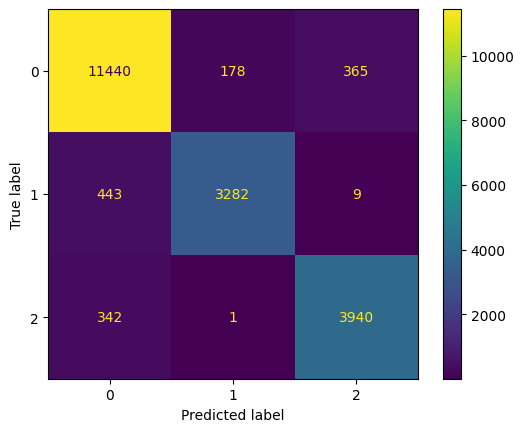

AUC: 0.9809968878775482
F1 Score: GALAXY 0.945142101784534
F1 Score: QSO 0.9123002084781098
F1 Score: STAR 0.9165988135396068


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score

mat = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(mat)

disp.plot()
plt.show()

auc = roc_auc_score(y_test, log_reg.predict_proba(X_test), multi_class='ovr')
f1 = f1_score(y_test, pred, average = None)


print("AUC:", auc)

for ind, x in enumerate(f1):
  print("F1 Score:", log_reg.classes_[ind], f1[ind])

In [ ]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(log_reg.coef_))], axis = 1)
coefficients

,0,0,1,2
0,alpha,0.047385,0.403253,-0.450638
1,delta,-0.296248,0.936364,-0.640116
2,u,3.938813,-9.025076,5.086262
3,g,8.470514,-8.683946,0.213432
4,r,-2.189114,-1.545579,3.734693
5,i,-6.492046,8.960872,-2.468826
6,z,-4.505849,5.768858,-1.263009
7,run_ID,0.219769,0.191541,-0.411310
8,rerun_ID,0.000000,0.000000,0.000000
9,cam_col,-0.116614,-0.039519,0.156133


### Analysis of Coefficients

We can identify the statistical significance of each parameter by how large each of it's corresponding coef. is, divided into each of the seperate classifiers. 

In this model, we can see that Class 0 are classified as Galaxies, Class 1 are QSOs and Class 2 are Stars. With this reference we can break down the effect and statistical significance of each parameter for each class. 

 

*   The alpha and delta features at 0.403 and 0.934 respectively appear to be significant in determining classfication of QSO.


* The wavelength features such as u, g, r, i, z describe the specific slice of wavelengths that each object had it's apparent magnitude measured in. The magnitude measurements of these features is critical in determining the classfication of an object. 

* Redshift is also a significant feature in classifying objects. It's particulary useful in classifying Galaxy and QSO since it's more visible at much further distances which makes it easier to identify compared to Stars.

* These ID features run_ID, rereun_ID, cam_col, field_ID, fiber_ID don't appear to be significant in classfication. It's mainly used to capture meta data for each observation.

* MJD or Modified Julian Date demonstrates some significance in seperating Stars and Galaxies, namely it's likely that earlier surveys (smaller MJDs) were strictly galaxies, and as time progressed (larger MJDs) more surveys focused on stellar objects. 
 * This type of attribute might be erroneous as it's not building a model on stellar attributes, but rather the time that the star was observed, and as such should be used with caution. 



# Building a SVM model using PCA/Feature Reduction

In [8]:
from sklearn.decomposition import PCA
from sklearn.utils import resample

scaler = MinMaxScaler()

df_sub = resample(df, n_samples = 15000)

df_pca = df_sub.loc[:, ~df_sub.columns.isin(['obj_ID', 'class', 'spec_obj_ID'])]

df_rescaled = pd.DataFrame(scaler.fit_transform(df_pca))

In [11]:
df_pca = df_rescaled
pca = PCA(n_components = 0.95)
pca.fit(df_pca)
df_ppca = pd.DataFrame(pca.transform(df_pca))

Visualizing Variance explained by each component selected by PCA

Text(0.5, 1.0, 'Scree Plot')

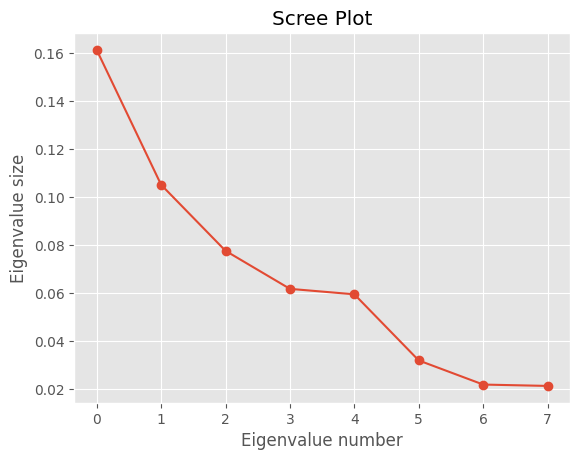

In [ ]:
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [15]:
y = df_sub["class"]
X = df_ppca
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We can utilize the class_weights variable when instantiating the SVC model to allows us compensate for the huge imbalance that exists in the dataset and by extension, subsample of the dataset. 

In [16]:
from sklearn.svm import SVC

svm = SVC(class_weight='balanced')
svm.fit(X_train, y_train)

SVC(class_weight='balanced')

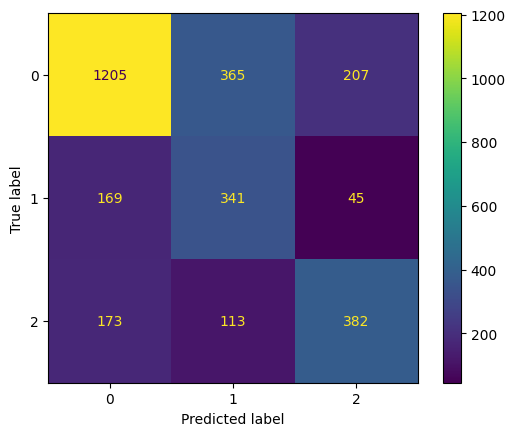

0.6426666666666667


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_svm = svm.predict(X_test)
score = accuracy_score(y_test, y_svm)

mat = confusion_matrix(y_test, y_svm)
disp = ConfusionMatrixDisplay(mat)

disp.plot()
plt.show()


print(score)

We've boosted our overall SVM performance, compared to only using subsampling, as utilizing PCA along with subsampling allows us to provide the SVM with more data and maintaining a lower computational time and size. 

 

In [ ]:
svm.support_

array([    1,     2,     4, ..., 11950, 11955, 11960], dtype=int32)

# SVM with SGD/No Subsampling

Using Stochiastic Gradient Descent with a Linear SVM classifier to quicken analysis and allow us to provide the full scope of data to an SVM model. 

In [18]:
from sklearn.decomposition import PCA

df_pca = df.loc[:, ~df.columns.isin(['obj_ID', 'class', 'spec_obj_ID'])]
df_rescaled = pd.DataFrame(scaler.fit_transform(df_pca))

df_pca = df_rescaled
pca = PCA(n_components = 0.95)
pca.fit(df_pca)
df_ppca = pd.DataFrame(pca.transform(df_pca))

y = df["class"]
X = df_ppca
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
from sklearn.linear_model import SGDClassifier as SGD

sgd = SGD(class_weight = "balanced", loss = "hinge") #Linear SVM with SGD
sgd.fit(X_train, y_train)



SGDClassifier(class_weight='balanced')

In [21]:
y_sgd = sgd.predict(X_test)
score = accuracy_score(y_test, y_sgd)
score

0.61675

Comparable results to SVM. 